# Install the FireDrone Client SDK
We have provided an easy to install SDK that you can use to control your drone within the simulation environment. Run the following command to pip install the SDK.

In [1]:
!pip install --index-url https://test.pypi.org/simple/ fire-drone-sdk -U

Looking in indexes: https://test.pypi.org/simple/


# Import dependencies
Once you the SDK installed, you need to import the FireDrone Client and related modules.

In [2]:
import firedrone.client as fdc
from firedrone.client.errors import FireDroneClientHttpError
import os

# Insert your FireDrone API Key

Your FireDrone API Key is provided to you when you register. To use the SDK, you'll to supply the key in the following cell:

In [3]:
# Use any convenient way to get your FireDrone API Key.
# You should use the user token you received when registering to the contest.
user_token = 'Lr1glfOAW$cAeyR#%e6PCqsu0RezcYa4kxJftHlOQ^d-fRT3@llox6?p_G1VBku?'

# Create a FireDrone workspace

In [4]:
# Create a new client workspace.
# -------------------------------------------------------------------------------------------
workspace = fdc.Workspace(user_token)

# Get a list of available scenes your drone can image
Your drone will scan a large scene, and is provided images within its field of view for that larger scene. To begin, you need to choose a scene.

In [5]:
# Get a list of available scenes.
# -------------------------------------------------------------------------------------------
scenes = workspace.get_scenes()
print(scenes)

Sending GET request to https://api.firedrone.ai/v1/scenes/all
[{'id': 2, 'name': 'Scene 1', 'description': 'The description of scene 1', 'isDisabled': False}, {'id': 3, 'name': 'Hot Scene', 'description': 'This is a really challenging scene.', 'isDisabled': False}, {'id': 4, 'name': 'Hot Scene 2', 'description': 'This is a really challenging scene.', 'isDisabled': False}, {'id': 5, 'name': 'Hot Scene 3', 'description': 'This is a really challenging scene.', 'isDisabled': False}, {'id': 6, 'name': 'Hot Scene 5', 'description': 'This is a really challenging scene.', 'isDisabled': False}, {'id': 7, 'name': 'Hot Scene 6', 'description': 'This is a really challenging scene.', 'isDisabled': False}, {'id': 8, 'name': 'Hot Scene 7', 'description': 'This is a really challenging scene.', 'isDisabled': False}, {'id': 9, 'name': 'Hot Scene 8', 'description': 'This is a really challenging scene.', 'isDisabled': False}, {'id': 10, 'name': 'Hot Scene 9', 'description': 'This is a really challenging s

# Start a direct run
When you want to fly a virtual drone around the scene, you need to start a direct run. This will collect telemetry about your run in the back end as well, that we will use later during the competition rounds.

In [6]:
# Start a new direct
# -------------------------------------------------------------------------------------------

start_result = workspace.directrun_start(21)
print(start_result)

Sending POST request to https://api.firedrone.ai/v1/directruns/start?sceneid=21
{'uniqueId': 'f8dfa89e-f344-4101-8d9e-b07d714efca7'}


# Request the current image from the drone's field of view.
You can request a frame from the drone showing what it currently "sees" in its field of view (FoV).

In [7]:
frame = workspace.get_drone_fov_image(start_result['uniqueId'])
with open('./frame.png', 'wb') as f:
   f.write(frame)

Sending GET request to https://api.firedrone.ai/v1/directruns/f8dfa89e-f344-4101-8d9e-b07d714efca7/dronefieldofviewimage


Now take a look at the image received from the drone's framebuffer.

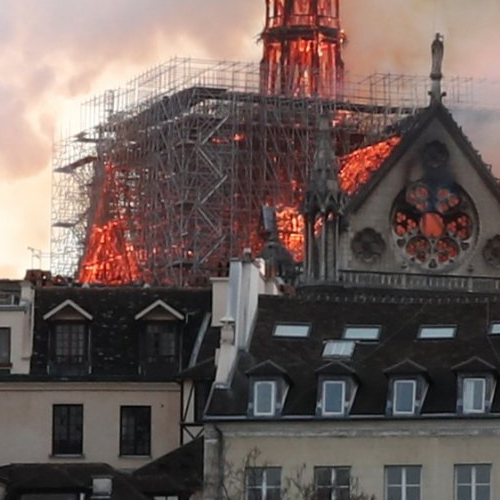

In [8]:
from IPython.display import Image
Image(filename='frame.png') 

# Move the drone
You can move the drone up, down, left and right and then re-request the frame from the FoV.

In [9]:
move_result = workspace.directrun_move_right(start_result['uniqueId'])
move_result

Sending POST request to https://api.firedrone.ai/v1/directruns/f8dfa89e-f344-4101-8d9e-b07d714efca7/moveright


{'success': True}

If you get a response of `{'success':True}` then the drone moved. If you get `False` back, then the drone was already at the edges of the scene and did not move.

Sending GET request to https://api.firedrone.ai/v1/directruns/f8dfa89e-f344-4101-8d9e-b07d714efca7/dronefieldofviewimage


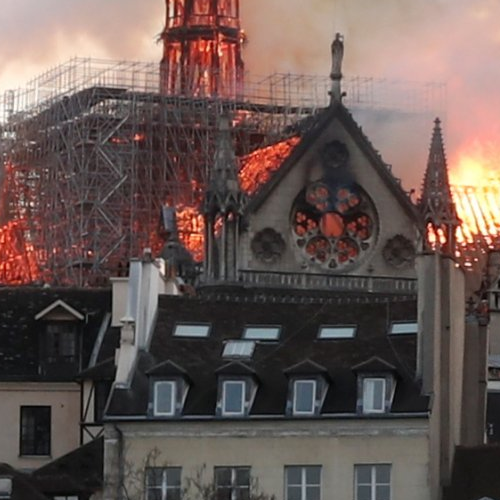

In [10]:
frame = workspace.get_drone_fov_image(start_result['uniqueId'])
with open('./frame.png', 'wb') as f:
   f.write(frame)
Image(filename='frame.png') 

From here, you are ready to begin crafting your solution. How will you process the images for fire? How will you navigate the drone across the scene? How will you operationalize (e.g., manage model version, deploy updates to code and/or model)?

# How your logic will be evaluated
Once you are familiar with the basics of interacting with your drone in simulation, you should take a moment to consider how the simulation environment will call your logic to make decisions during the scoring phase. 

The competition support two different approaches for you participate.

- **Direct Run**: This is basically manual mode. You control the drone's movement, when to request frames and when to scores a frame as containing fire or not (or indicate the pixels within the frame that are indicative of fire).
- **Reverse Run**:  This is auto-pilot mode. You will supply the logic to automatically decide what do, but the simulation environment will call you to ask for actions. 

In either case, we will log, monitor and evaluate the peformance fo the drone

## Direct Run
The following shows how you could call the scoring function within the context of a direct run. The previous frame clearly showed fire, so you would call tell the system fire was detected by passing `True` to the `directrun_score()` method (alternately, pass `False` to indicate no fire detected).

In [11]:
workspace.directrun_score(start_result['uniqueId'], True)

Sending POST request to https://api.firedrone.ai/v1/directruns/f8dfa89e-f344-4101-8d9e-b07d714efca7/score?firedetected=True


{'scoreRecorded': True}

Alternately, instead of supplying True or False, you can supply a bitmask that indicates which pixels indicate fire in the frame as a flattened array instead of 2D matrix. 

For example, if the frame you received from the drone is 20 pixels by 30 pixels you would have `20x30=600` entries in the array, one entry for every pixel in the frame. Each entry has a value of either a 0 (no fire) or a 1 (fire detected). 

In [ ]:
pixels_on_fire = [0,1,1,1,1,1,0,0]
score_result = workspace.directrun_score_pixels(start_result['uniqueId'], pixels_on_fire)
print(score_result)

In either case, you will get back `{'scoreRecorded': True}` thatt confirms your scoring was successfully recorded in the system.

## Reverse Run
Once you have demonstrated you are ready to go with the Direct Run method, we'll provide you instructions on how to integrate your logic with a reverse run. We look forward to seeing how your drone does on autopilot!